In [1]:
import pandas as pd

myfile="C:/Users/Admin/Desktop/Machine Learning & Big Data/Project Assessment- Part 1/ICM317_Report_DataSet_2000Rows.csv"
DataRead=pd.read_csv(myfile)
DataRead

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
0,0.83,JOB_B,0,3,-0.83,2,3,0.33,0.54,6.0,4,0.4,2
1,0.61,JOB_B,1,1,-0.61,8,4,0.17,0.24,4.0,0,0.8,1
2,0.07,JOB_B,1,5,-0.07,4,4,0.10,0.97,10.0,8,0.5,1
3,0.27,JOB_A,1,5,-0.27,3,9,0.26,0.01,7.0,3,1.0,1
4,0.41,JOB_A,0,3,-0.41,7,0,0.62,0.50,7.0,4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.01,JOB_A,2,3,-0.01,7,9,0.91,0.13,3.0,7,0.7,2
1996,0.10,JOB_A,1,3,-0.10,1,6,0.27,0.30,9.0,8,0.6,1
1997,0.97,JOB_C,0,1,-0.97,7,6,0.04,0.13,NaN,4,0.8,1
1998,0.44,JOB_A,1,5,-0.44,5,6,0.23,0.79,8.0,4,0.7,1


In [2]:
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Data=DataRead
Data.isnull().sum()

FEAT_0        0
FEAT_1        0
FEAT_2        0
FEAT_3        0
FEAT_4        0
FEAT_5        0
FEAT_6        0
FEAT_7        0
FEAT_8        0
FEAT_9      184
FEAT_10       0
FEAT_11       0
CATEGORY      0
dtype: int64

In [3]:
enc_x=LabelEncoder()
Data['FEAT_1']=enc_x.fit_transform(Data['FEAT_1'])
# Encode Categorical variable 'FEAT_1' on Data set

In [4]:
Data.describe()

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1816.000000,2000.000000,2000.000000,2000.000000
mean,0.321475,0.931000,1.0285,2.981000,-0.321475,31.293500,4.949500,0.335185,0.328700,4.997797,5.026500,0.510650,1.071500
std,0.296347,1.099474,0.7127,1.235072,0.296347,159.895555,3.196257,0.298688,0.292039,3.216006,3.143523,0.290885,0.699737
min,0.000000,0.000000,0.0000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000000,1.0000,2.000000,-0.540000,2.000000,2.000000,0.070000,0.070000,2.000000,2.000000,0.300000,1.000000
50%,0.230000,0.000000,1.0000,3.000000,-0.230000,5.000000,5.000000,0.250000,0.240000,5.000000,5.000000,0.500000,1.000000
75%,0.540000,2.000000,2.0000,4.000000,-0.050000,8.000000,8.000000,0.560000,0.540000,8.000000,8.000000,0.800000,1.000000
max,1.000000,3.000000,2.0000,5.000000,0.000000,1000.000000,10.000000,1.000000,1.000000,10.000000,10.000000,1.000000,3.000000


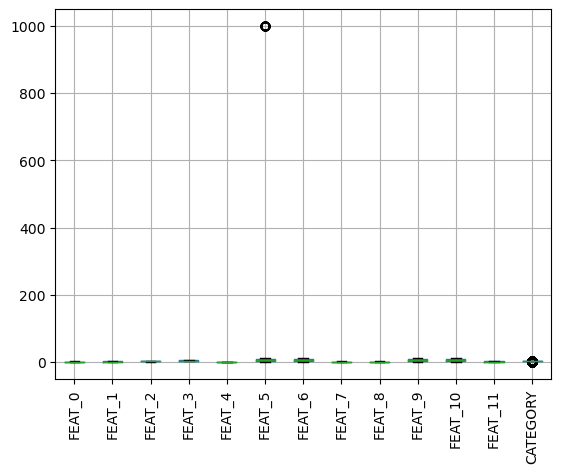

In [5]:
Data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [6]:
# droping outliers and NaNs

def drop_outliers(Data, column):
    Q1 = Data[column].quantile(0.25)
    Q3 = Data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data = Data[(Data[column] > lower_bound) & (Data[column] < upper_bound)]
    return Data

Data = drop_outliers(Data, 'FEAT_5')

Data.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11900\3448820206.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.dropna(inplace=True)


In [7]:
Data

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
0,0.83,1,0,3,-0.83,2,3,0.33,0.54,6.0,4,0.4,2
1,0.61,1,1,1,-0.61,8,4,0.17,0.24,4.0,0,0.8,1
2,0.07,1,1,5,-0.07,4,4,0.10,0.97,10.0,8,0.5,1
3,0.27,0,1,5,-0.27,3,9,0.26,0.01,7.0,3,1.0,1
4,0.41,0,0,3,-0.41,7,0,0.62,0.50,7.0,4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.03,0,0,3,-0.03,7,8,0.00,0.10,7.0,4,0.4,1
1995,0.01,0,2,3,-0.01,7,9,0.91,0.13,3.0,7,0.7,2
1996,0.10,0,1,3,-0.10,1,6,0.27,0.30,9.0,8,0.6,1
1998,0.44,0,1,5,-0.44,5,6,0.23,0.79,8.0,4,0.7,1


In [8]:
Data.isnull().sum()

FEAT_0      0
FEAT_1      0
FEAT_2      0
FEAT_3      0
FEAT_4      0
FEAT_5      0
FEAT_6      0
FEAT_7      0
FEAT_8      0
FEAT_9      0
FEAT_10     0
FEAT_11     0
CATEGORY    0
dtype: int64

In [9]:
Data.describe()

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,0.315445,0.933144,1.028329,2.967705,-0.315445,4.955807,4.950142,0.333915,0.330793,5.005099,5.009065,0.515977,1.061756
std,0.292728,1.100431,0.710539,1.236070,0.292728,3.137130,3.197541,0.298545,0.291547,3.222384,3.149691,0.291576,0.703195
min,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000000,1.000000,2.000000,-0.530000,2.000000,2.000000,0.070000,0.070000,2.000000,2.000000,0.300000,1.000000
50%,0.230000,0.000000,1.000000,3.000000,-0.230000,5.000000,5.000000,0.250000,0.240000,5.000000,5.000000,0.500000,1.000000
75%,0.530000,2.000000,2.000000,4.000000,-0.050000,8.000000,8.000000,0.560000,0.550000,8.000000,8.000000,0.800000,1.000000
max,1.000000,3.000000,2.000000,5.000000,0.000000,10.000000,10.000000,1.000000,1.000000,10.000000,10.000000,1.000000,3.000000


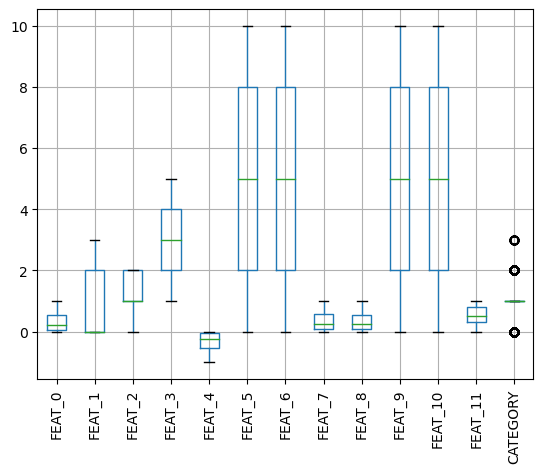

In [10]:
Data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [11]:
corr = Data.corr()
corr.style.background_gradient(cmap='YlOrRd')

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
FEAT_0,1.000000,0.017022,-0.012107,-0.009415,-1.000000,-0.078655,0.030349,0.018928,0.014502,-0.047970,-0.037504,0.022824,0.262390
FEAT_1,0.017022,1.000000,0.049550,-0.014508,-0.017022,-0.023025,-0.003848,-0.015095,-0.037842,-0.027081,-0.016835,-0.006033,-0.063525
FEAT_2,-0.012107,0.049550,1.000000,0.015242,0.012107,0.012261,0.005363,0.014656,-0.028487,0.008603,-0.005181,-0.019425,0.309642
FEAT_3,-0.009415,-0.014508,0.015242,1.000000,0.009415,-0.011187,0.006190,-0.035589,-0.025130,0.027652,-0.006040,0.002848,-0.244237
FEAT_4,-1.000000,-0.017022,0.012107,0.009415,1.000000,0.078655,-0.030349,-0.018928,-0.014502,0.047970,0.037504,-0.022824,-0.262390
FEAT_5,-0.078655,-0.023025,0.012261,-0.011187,0.078655,1.000000,-0.016044,0.026817,0.044584,0.033333,-0.004951,0.022340,-0.011611
FEAT_6,0.030349,-0.003848,0.005363,0.006190,-0.030349,-0.016044,1.000000,0.004231,-0.033385,-0.000636,-0.000518,-0.042559,0.468551
FEAT_7,0.018928,-0.015095,0.014656,-0.035589,-0.018928,0.026817,0.004231,1.000000,0.002936,0.018883,-0.045512,-0.006105,0.105105
FEAT_8,0.014502,-0.037842,-0.028487,-0.025130,-0.014502,0.044584,-0.033385,0.002936,1.000000,0.022781,0.028810,-0.015947,0.249564
FEAT_9,-0.047970,-0.027081,0.008603,0.027652,0.047970,0.033333,-0.000636,0.018883,0.022781,1.000000,-0.023743,-0.005698,-0.000890


In [12]:
# Separate features and target variable

x = Data.drop(['CATEGORY'], axis=1)
y = Data['CATEGORY']

# Split data into 70% training and 30% testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Training Accuracy: 1.0
Training Error Score 0.0
Test Accuracy: 0.7188679245283018
Test Error Score 0.28113207547169816


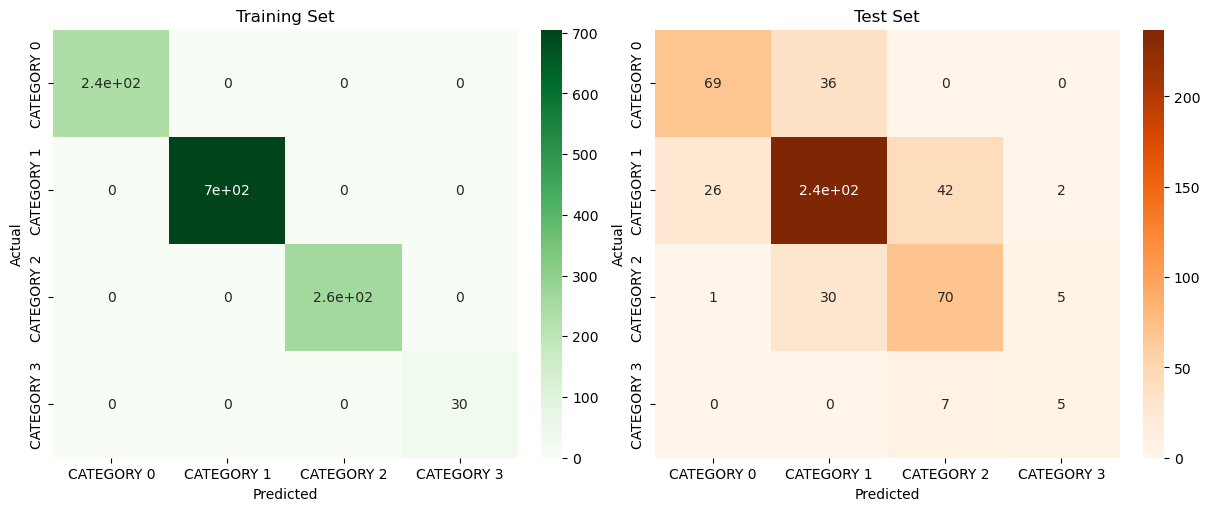

In [13]:
# 1) DECISION TREE

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_trainPredict=dtc.predict(x_train)
y_testPredict=dtc.predict(x_test)

cm1=confusion_matrix(y_train, y_trainPredict)
cm2=confusion_matrix(y_test, y_testPredict)

    
labels=['CATEGORY 0','CATEGORY 1','CATEGORY 2','CATEGORY 3']

Data_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
Data_cm1.index.name='Actual'
Data_cm1.columns.name='Predicted'

Data_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
Data_cm2.index.name='Actual'
Data_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snsFig=sns.heatmap(Data_cm1, ax=ax1, cmap="Greens", annot=True)
snsFig=sns.heatmap(Data_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

print('Training Accuracy:', metrics.accuracy_score(y_train,y_trainPredict))
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_trainPredict)))


print('Test Accuracy:', metrics.accuracy_score(y_test, y_testPredict))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_testPredict)))


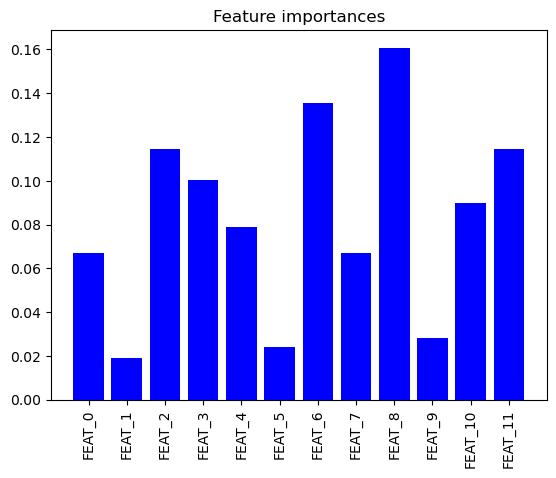

In [14]:
# Ploting the Feature Importances for Decision Tree.

plt.figure()
plt.title("Feature importances")
Features=['FEAT_0','FEAT_1','FEAT_2','FEAT_3','FEAT_4','FEAT_5','FEAT_6','FEAT_7','FEAT_8','FEAT_9','FEAT_10','FEAT_11']
plt.bar(Features, dtc.feature_importances_, color="b", align="center")
plt.xticks(rotation=90)
plt.show()

Training Accuracy: 1.0
Training Error Score 0.0
Test Accuracy: 0.8056603773584906
Test Error Score 0.1943396226415094


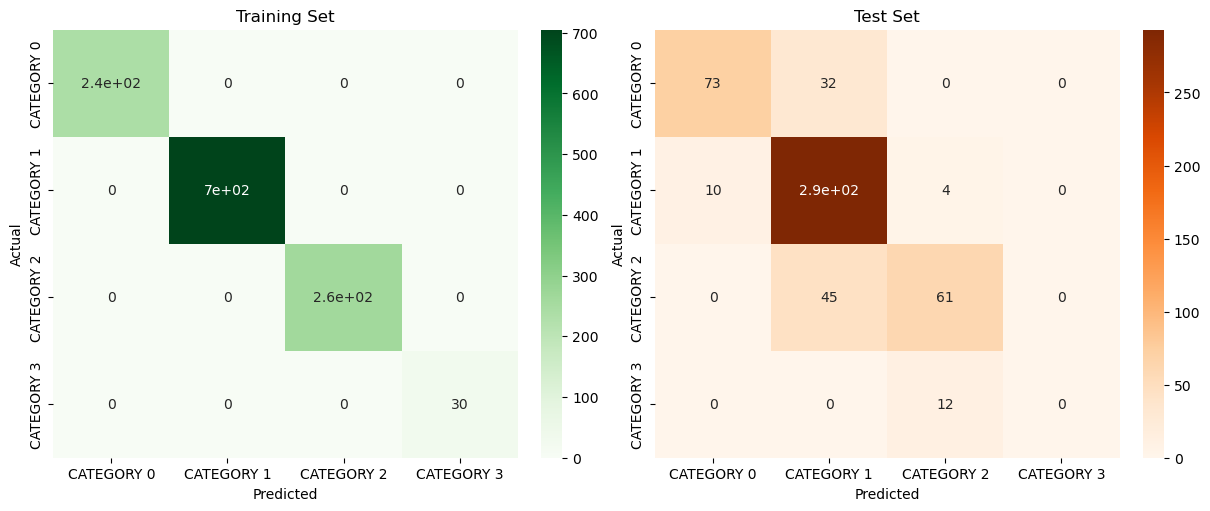

In [15]:
# 2) RANDOM FOREST

rfc=RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(x_train, y_train)
y_trainPredict=rfc.predict(x_train)
y_testPredict=rfc.predict(x_test)

cm1=confusion_matrix(y_train, y_trainPredict)
cm2=confusion_matrix(y_test, y_testPredict)
    
labels=['CATEGORY 0','CATEGORY 1','CATEGORY 2','CATEGORY 3']

Data_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
Data_cm1.index.name='Actual'
Data_cm1.columns.name='Predicted'

Data_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
Data_cm2.index.name='Actual'
Data_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snsFig=sns.heatmap(Data_cm1, ax=ax1, cmap="Greens", annot=True)
snsFig=sns.heatmap(Data_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')


print('Training Accuracy:', metrics.accuracy_score(y_train,y_trainPredict))
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_trainPredict)))


print('Test Accuracy:', metrics.accuracy_score(y_test, y_testPredict))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_testPredict)))


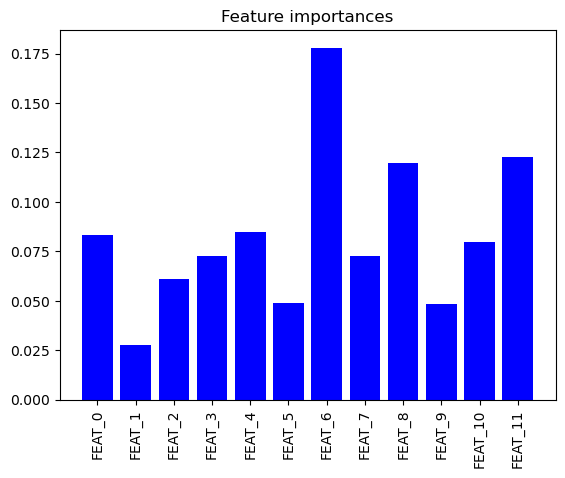

In [16]:
# Ploting the Feature Importances for Random Forest.

plt.figure()
plt.title("Feature importances")
Features=['FEAT_0','FEAT_1','FEAT_2','FEAT_3','FEAT_4','FEAT_5','FEAT_6','FEAT_7','FEAT_8','FEAT_9','FEAT_10','FEAT_11']
plt.bar(Features, rfc.feature_importances_, color="b", align="center")
plt.xticks(rotation=90)
plt.show()

In [17]:
# 3) K NEAREST NEIGHBOURS

# Using K=5, 200 Monte Carlo Train/Test splits
# C=4 Classes ['CATEGORY 0','CATEGORY 1','CATEGORY 2','CATEGORY 3']
# M=12 Features [FEAT_0,FEAT_1,FEAT_2,...,FEAT_11]
# Using KNearestNeighbours based on majority selection and not on weighted distance


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# To supress a future warning in KNearest neighbours. The behaviour is good with the currnet format.


kvalue=5
numTrials=200
knn=KNeighborsClassifier(n_neighbors=kvalue)
np.random.seed(seed=1)
# Seed the random number generator that will be used to split Training Set and Test Set
      
score_train=0.0
score_test=0.0
accuracy_train=0.0
accuracy_test=0.0
labelenc_x=LabelEncoder()
scaler = StandardScaler()


for trial in range(1,numTrials+1,1):

    # Split into two to get a training set (70%) and a test set (30%)
    train_set, test_set = train_test_split(Data, test_size=0.3)
    
    #train
    x_train=train_set.drop('CATEGORY', axis=1)
    y_train = train_set['CATEGORY']
    
    #test
    x_test=test_set.drop('CATEGORY', axis=1)
    y_test = test_set['CATEGORY']
    
    labelenc_x=LabelEncoder()
    scaler = StandardScaler()

    #train
    x_train['FEAT_1']=labelenc_x.fit_transform(x_train['FEAT_1'])
    x_train_scaled = scaler.fit_transform(x_train)

    #test
    x_test['FEAT_1']=labelenc_x.fit_transform(x_test['FEAT_1'])
    x_test_scaled = scaler.fit_transform(x_test)
    
    
    knn.fit(x_train_scaled,y_train.values.ravel())
    y_trainPredict=knn.predict(x_train_scaled)
    accuracy_train=accuracy_train+accuracy_score(y_train, y_trainPredict)
    score_train=score_train+(1.0-metrics.accuracy_score(y_train.values.ravel(),y_trainPredict))

    y_testPredict=knn.predict(x_test_scaled)
    accuracy_test=accuracy_test+accuracy_score(y_test, y_testPredict)
    score_test=score_test+(1.0-metrics.accuracy_score(y_test.values.ravel(),y_testPredict))
    
print("Average Accuracy On Training Set = "+str(accuracy_train/numTrials))
print("Average Error Score On Training Set = "+str(score_train/numTrials))
print("Average Accuracy On Test Set = "+str(accuracy_test/numTrials))
print("Average Error Score On Test Set = "+str(score_test/numTrials))


Average Accuracy On Training Set = 0.8243238866396762
Average Error Score On Training Set = 0.175676113360324
Average Accuracy On Test Set = 0.7137547169811321
Average Error Score On Test Set = 0.28624528301886804


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

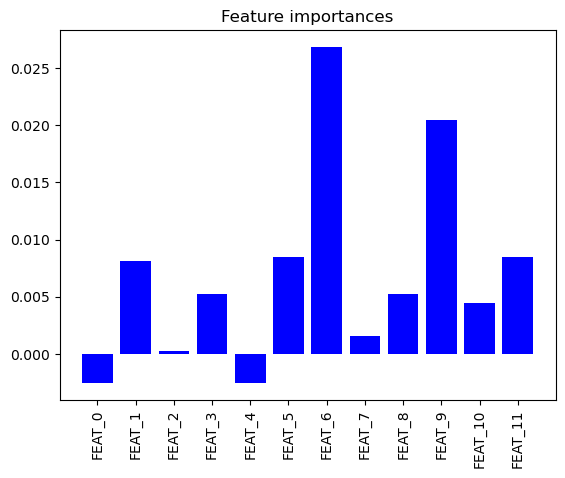

In [18]:
# Ploting the Feature Importances for K Nearest Neighbours.

# Calculate feature importance using permutation importance
result = permutation_importance(knn, x, y, n_repeats=10, random_state=0)

# Plot the importance scores for each feature
plt.figure()
plt.title("Feature importances")
plt.bar(Features, result.importances_mean, color="b", align="center")
plt.xticks(rotation=90)
plt.show()

Training Accuracy: 0.7838056680161943
Training Error Score 0.21619433198380567
Test Accuracy: 0.7811320754716982
Test Error Score 0.21886792452830184


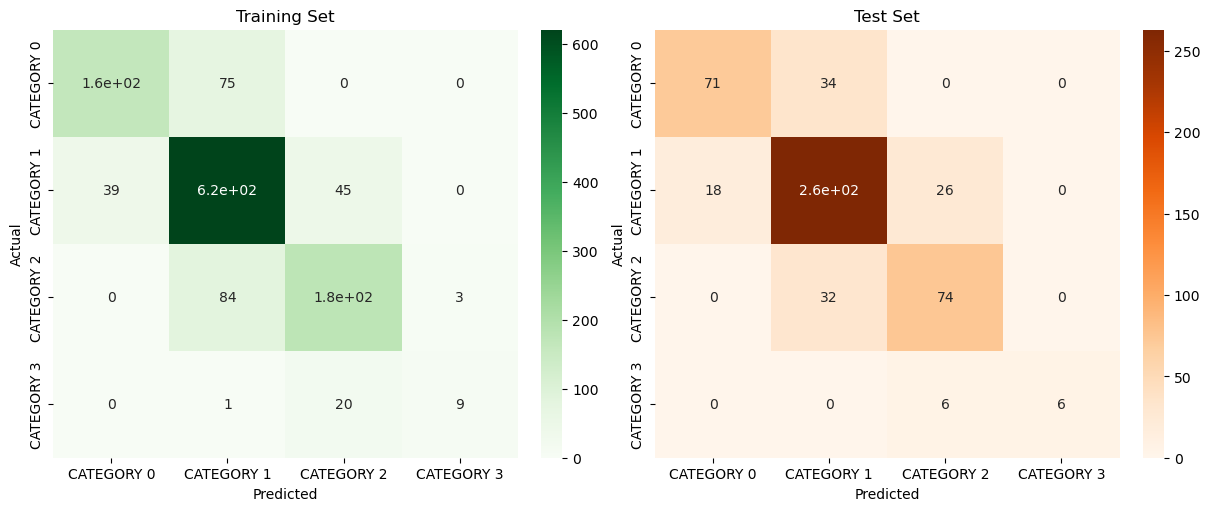

In [19]:
# 4) LOGISTIC REGRESSION

scaler = StandardScaler()
x = scaler.fit_transform(x)
# Feature scaling

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Split into two to get a training set (70%) and a test set (30%)

logreg=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg.fit(x_train, y_train) 
# Logistic Regression algorithm used

labels=['CATEGORY 0','CATEGORY 1','CATEGORY 2','CATEGORY 3']

y_trainPredict=logreg.predict(x_train)
y_testPredict=logreg.predict(x_test)

cm1=confusion_matrix(y_train, y_trainPredict)
cm2=confusion_matrix(y_test, y_testPredict)
    
Data_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
Data_cm1.index.name='Actual'
Data_cm1.columns.name='Predicted'

Data_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
Data_cm2.index.name='Actual'
Data_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snsFig=sns.heatmap(Data_cm1, ax=ax1, cmap="Greens", annot=True)
snsFig=sns.heatmap(Data_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

accuracy = accuracy_score(y_train, y_trainPredict)

print('Training Accuracy:', metrics.accuracy_score(y_train,y_trainPredict))
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_trainPredict)))

print('Test Accuracy:', metrics.accuracy_score(y_test, y_testPredict))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_testPredict)))


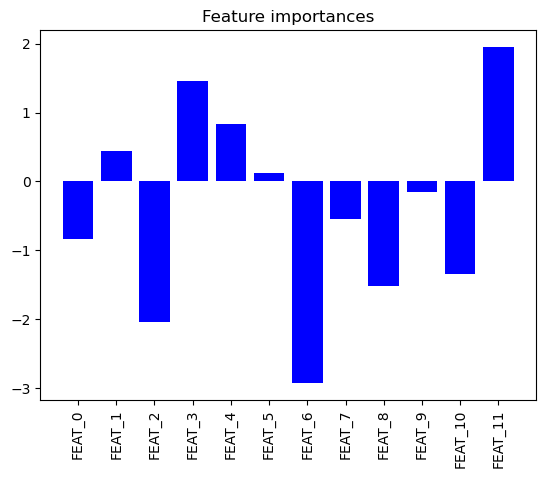

In [20]:
# Ploting the Feature Importances for Logistic Regression.

plt.figure()
plt.title('Feature importances')
Features=['FEAT_0','FEAT_1','FEAT_2','FEAT_3','FEAT_4','FEAT_5','FEAT_6','FEAT_7','FEAT_8','FEAT_9','FEAT_10','FEAT_11']
plt.bar(Features, logreg.coef_[0], color='b', align='center')
plt.xticks(rotation=90)
plt.show()